<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/titanic_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal

This is a kaggle competition: [Original Notebook](https://www.kaggle.com/competitions/titanic/overview)

> Create a deep learning model to predict if passanger onboard the titanic died

In [357]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [358]:
# Global Variables
RANDOM_STATE = 42

# Explore data


In [359]:
# Import data from github
!wget https://raw.githubusercontent.com/moimigueldev/tensorflow-ztm/main/datasets/titanic/train.csv
!wget https://raw.githubusercontent.com/moimigueldev/tensorflow-ztm/main/datasets/titanic/test.csv

--2022-05-14 20:32:48--  https://raw.githubusercontent.com/moimigueldev/tensorflow-ztm/main/datasets/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv.6’

train.csv.6         100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2022-05-14 20:32:48 (49.4 MB/s) - ‘train.csv.6’ saved [61194/61194]

--2022-05-14 20:32:48--  https://raw.githubusercontent.com/moimigueldev/tensorflow-ztm/main/datasets/titanic/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28

Let's import the test and training dataset and explore for similiarties, missing data and structure

In [360]:
# Import 
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [361]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [362]:
df_test.isnull().sum(), df_test.isnull().sum(),

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

Both datasets have missing values. Will need to create a function to preprocess different datasets the same way

## Explore Test Data: numerical

In [363]:
train_categorical = [x for x in df_train.columns if df_train[x].dtype == 'O']
train_numerical = [x for x in df_train.columns if df_train[x].dtype != 'O']
train_categorical, train_numerical

(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

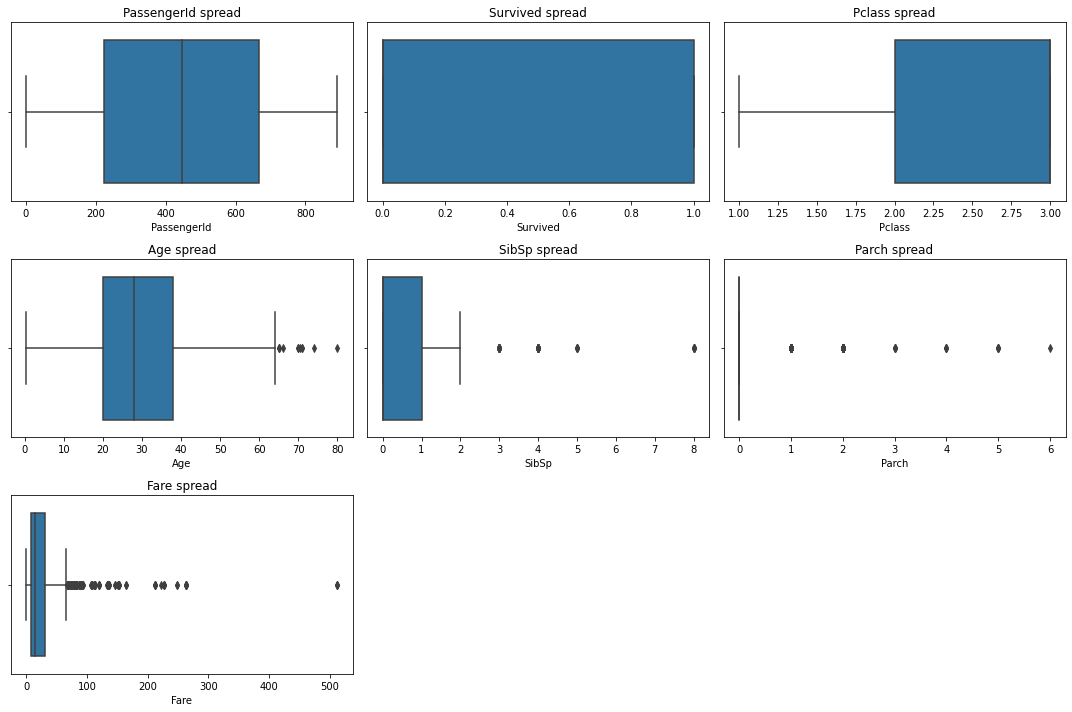

In [364]:
# Let's visualize the spread 
plt.figure(figsize=(15, 10))
for i, x in enumerate(df_train[train_numerical]):
  plt.subplot(3, 3, i + 1)
  sns.boxplot(df_train[x])
  plt.title(f'{x} spread')

plt.tight_layout()


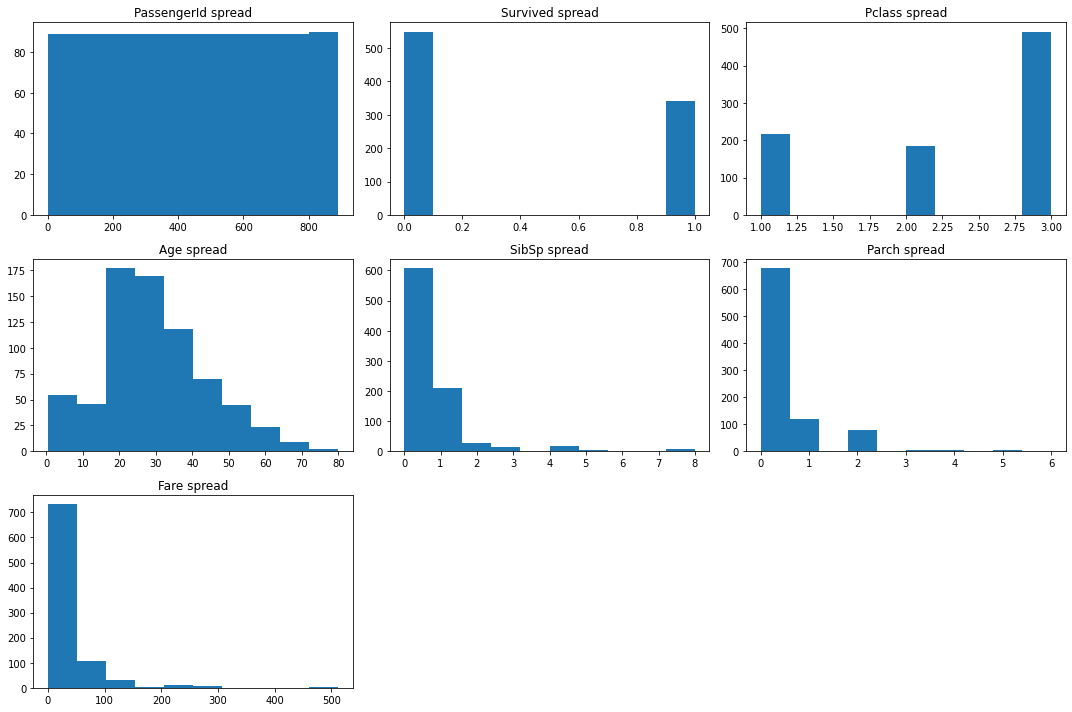

In [365]:
plt.figure(figsize=(15, 10))
for i, x in enumerate(df_train[train_numerical]):
  plt.subplot(3, 3, i + 1)
  plt.hist(df_train[x])
  plt.title(f'{x} spread')

plt.tight_layout()


In [366]:
df_train[train_numerical].to_csv('train_numerical.csv')

In [367]:
df_train[train_numerical].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

Looking at the preprocessed numerical data we can see that half of the numerical data has significant outliers and are heavily skewed and unevenly distributed. 

## Transform Numerical data

There are a couple things we can do to improve the dataset:

1. Convert columns to float32.
2. Replace missing values in the dataset with the median
3. Run a IQR assesment to replace significant outliers



In [368]:
df_train[train_numerical].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [369]:
# Convert all numerical types to float32 to simplify datatypes we are working with.
for x in df_train[train_numerical]:
  df_train[x] = df_train[x].astype({x: np.float32 })
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float32
 1   Survived     891 non-null    float32
 2   Pclass       891 non-null    float32
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float32
 6   SibSp        891 non-null    float32
 7   Parch        891 non-null    float32
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float32
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float32(7), object(5)
memory usage: 59.3+ KB


In [370]:
# Replace missing values with median
for x in df_train[train_numerical]:
  if df_train[x].isnull().sum():
    df_train[x].fillna(value=df_train[x].median(), inplace=True)



# Run IQR assesment to deal with the outliers

In [371]:
for(i, x) in enumerate(train_numerical):
  IQR = df_train[x].quantile(0.75) - df_train[x].quantile(0.25)
  Lower_fence = df_train[x].quantile(0.25) - (IQR * 3)
  Upper_fence = df_train[x].quantile(0.75) + (IQR * 3)
  print('min', df_train[x].min(), 'max', df_train[x].max())
  print('{name} outliers are values < {lowerboundary} or > {upperboundary} \n'.format(
  name=x, lowerboundary=Lower_fence, upperboundary=Upper_fence))

min 1.0 max 891.0
PassengerId outliers are values < -1111.5 or > 2003.5 

min 0.0 max 1.0
Survived outliers are values < -3.0 or > 4.0 

min 1.0 max 3.0
Pclass outliers are values < -1.0 or > 6.0 

min 0.41999998688697815 max 80.0
Age outliers are values < -17.0 or > 74.0 

min 0.0 max 8.0
SibSp outliers are values < -3.0 or > 4.0 

min 0.0 max 6.0
Parch outliers are values < 0.0 or > 0.0 

min 0.0 max 512.3292236328125
Fare outliers are values < -61.358399391174316 or > 100.26879954338074 



From Running the Assesment, It looks like `Age`, `SubSp`, `Parch`, `Fare` are features that need to have their outliers capped by the provided assesment which correlates to the visual representation of the boxplot we did earlier.




In [372]:
def max_value(df2, variable, top):
    return np.where(df2[variable] > top, top, df2[variable])

df_train[train_numerical].columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [373]:
# Replace the outliers with max

outliers = {'Age':74.0, 
            'SibSp':4 ,
            'Parch':0.0,
            'Fare':100.26879954338074
            }
for x in outliers:
  df_train[x] = max_value(df_train, x, outliers[x], )


In [374]:
df_train['SibSp'].max()

4.0

## Explore Test Data: categorical

The numerical data for the dataset has been cleaned, now lets expolore the categorical side

In [375]:
df_train[train_categorical].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [376]:
df_train[train_categorical]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [377]:
df_train['Cabin'].unique()


array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [378]:
df_train['Cabin'].mode()[0]

'B96 B98'

#### Clean up `Cabin`

Cabin has a lot of missing values and some passangers have multiple cabins to themselves.

How?

* Let's loop through the sample of cabins in the training set and record the cabin number(s). 
* All Cabins will be recorded into a list and we can find the mode inside that list
* Replace all missing values in cabin with the mode of the recorded list.



In [379]:
cabins = []
for x in df_train['Cabin']:
  if x == x:
    xList = x.split(' ') 
    for j in xList: 
      cabins.append(j)
cabins_mode = max(set(cabins), key = cabins.count)
cabins_mode

'B96'

# Update missing values

the categorical data has two columns that are missing data:
* Cabin
* Embarkment

Let's replace both column's missing values with the median
`B96` is the most common room. We will replace missing values with this room


In [380]:


df_train['Cabin'].fillna(value=cabins_mode, inplace=True)
df_train['Embarked'].fillna(value=df_train['Embarked'].mode()[0], inplace=True)

df_train[train_categorical].isnull().sum()

Name        0
Sex         0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [381]:
df_train[train_categorical]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,B96,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


# Remove unwanted features

For the first models we will remove 3 features :

* PassengerId -> There is no significance to this feature
* Name -> We will feature engineer later
* Ticket -> We will feature engineer later

In [382]:
df_train_1 = df_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_train_1

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3.0,male,22.0,1.0,0.0,7.250000,B96,S
1,1.0,1.0,female,38.0,1.0,0.0,71.283302,C85,C
2,1.0,3.0,female,26.0,0.0,0.0,7.925000,B96,S
3,1.0,1.0,female,35.0,1.0,0.0,53.099998,C123,S
4,0.0,3.0,male,35.0,0.0,0.0,8.050000,B96,S
...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,male,27.0,0.0,0.0,13.000000,B96,S
887,1.0,1.0,female,19.0,0.0,0.0,30.000000,B42,S
888,0.0,3.0,female,28.0,1.0,0.0,23.450001,B96,S
889,1.0,1.0,male,26.0,0.0,0.0,30.000000,C148,C


In [383]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float32
 1   Pclass    891 non-null    float32
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float32
 4   SibSp     891 non-null    float32
 5   Parch     891 non-null    float32
 6   Fare      891 non-null    float32
 7   Cabin     891 non-null    object 
 8   Embarked  891 non-null    object 
dtypes: float32(6), object(3)
memory usage: 41.9+ KB


# Preprocess

The train data is cleaned and now we can:
* run one hot encode and split into X & y

In [384]:
# One hot encode
df_train_1 = pd.get_dummies(df_train_1, drop_first=True)
df_train_1 

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0.0,3.0,22.0,1.0,0.0,7.250000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1.0,38.0,1.0,0.0,71.283302,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,3.0,26.0,0.0,0.0,7.925000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,35.0,1.0,0.0,53.099998,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.0,3.0,35.0,0.0,0.0,8.050000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,1.0,1.0,19.0,0.0,0.0,30.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,0.0,3.0,28.0,1.0,0.0,23.450001,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,1.0,1.0,26.0,0.0,0.0,30.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
# Split
X = df_train_1.drop(['Survived'], axis=1)
y = df_train['Survived']

In [386]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

cols = X_train.columns

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)
X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0.0,0.612666,0.00,0.0,0.284236,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.5,0.306877,0.00,0.0,0.129652,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.429193,0.00,0.0,0.079038,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.347649,0.25,0.0,0.078331,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.075836,1.00,0.0,0.311912,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,1.0,0.279696,0.00,0.0,0.076295,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
708,0.0,0.374830,0.00,0.0,0.309169,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
709,1.0,0.551509,0.50,0.0,0.140705,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
710,0.0,0.184561,0.25,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Create Baseline Model

Epoch 1/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5914 - accuracy: 0.6503
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7949
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4582 - accuracy: 0.8202
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4220 - accuracy: 0.8399
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3876 - accuracy: 0.8455
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3774 - accuracy: 0.8483
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3733 - accuracy: 0.8567
Epoch 8/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3634 - accuracy: 0.8539
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3494 - accuracy: 0.8581
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8567
Epoch 11/

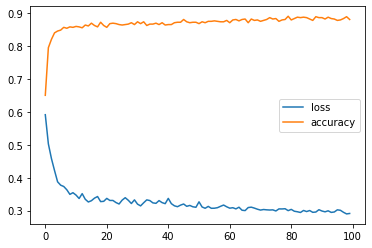

In [387]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(10, activation='relu'),
                               tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])
history_1 = model_1.fit(X_train, y_train, epochs=100, verbose=True)
pd.DataFrame(history_1.history).plot()

In [388]:
model_1.evaluate(X_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.8101


[0.5530191659927368, 0.8100558519363403]

The baseline model has high accuracy.
Before fine tuning. Let's validate across test dataset

# Clean Test Dataset

In [389]:
test_categorical = [x for x in df_test.columns if df_test[x].dtype == 'O']
test_numerical = [x for x in df_test.columns if df_test[x].dtype != 'O']
test_categorical, test_numerical

(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'],
 ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [390]:
df_test.isnull().sum(), df_test.isnull().sum(),

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64, PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64)

In [391]:
# Convert all numerical types to float32 to simplify datatypes we are working with.
for x in df_test[test_numerical]:
  df_test[x] = df_test[x].astype({x: np.float32 })
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    float32
 1   Pclass       418 non-null    float32
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float32
 5   SibSp        418 non-null    float32
 6   Parch        418 non-null    float32
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float32
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float32(6), object(5)
memory usage: 26.2+ KB


In [392]:
# Replace missing values with median
for x in df_test[test_numerical]:
  if df_test[x].isnull().sum():
    df_test[x].fillna(value=df_test[x].median(), inplace=True)

In [393]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [394]:
for(i, x) in enumerate(test_numerical):
  IQR = df_test[x].quantile(0.75) - df_test[x].quantile(0.25)
  Lower_fence = df_test[x].quantile(0.25) - (IQR * 3)
  Upper_fence = df_test[x].quantile(0.75) + (IQR * 3)
  print('min', df_test[x].min(), 'max', df_test[x].max())
  print('{name} outliers are values < {lowerboundary} or > {upperboundary} \n'.format(
  name=x, lowerboundary=Lower_fence, upperboundary=Upper_fence))

min 892.0 max 1309.0
PassengerId outliers are values < 370.75 or > 1830.25 

min 1.0 max 3.0
Pclass outliers are values < -5.0 or > 9.0 

min 0.17000000178813934 max 76.0
Age outliers are values < -15.25 or > 74.0 

min 0.0 max 8.0
SibSp outliers are values < -3.0 or > 4.0 

min 0.0 max 9.0
Parch outliers are values < 0.0 or > 0.0 

min 0.0 max 512.3292236328125
Fare outliers are values < -62.832425117492676 or > 102.20010042190552 



In [395]:
# Replace the outliers with max

outliers = {'Age':74.0, 
            'SibSp':4 ,
            'Parch':0.0,
            'Fare':102.20010042190552
            }
for x in outliers:
  df_test[x] = max_value(df_test, x, outliers[x], )

In [396]:
df_test[test_categorical].isnull().sum()

Name          0
Sex           0
Ticket        0
Cabin       327
Embarked      0
dtype: int64

In [397]:
cabins = []
for x in df_test['Cabin']:
  if x == x:
    xList = x.split(' ') 
    for j in xList: 
      cabins.append(j)
cabins_mode = max(set(cabins), key = cabins.count)
cabins_mode

'F'

In [398]:
df_test['Cabin'].fillna(value=cabins_mode, inplace=True)
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [399]:
df_test_1 = df_test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_test_1


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3.0,male,34.5,0.0,0.0,7.829200,F,Q
1,3.0,female,47.0,1.0,0.0,7.000000,F,S
2,2.0,male,62.0,0.0,0.0,9.687500,F,Q
3,3.0,male,27.0,0.0,0.0,8.662500,F,S
4,3.0,female,22.0,1.0,0.0,12.287500,F,S
...,...,...,...,...,...,...,...,...
413,3.0,male,27.0,0.0,0.0,8.050000,F,S
414,1.0,female,39.0,0.0,0.0,102.200104,C105,C
415,3.0,male,38.5,0.0,0.0,7.250000,F,S
416,3.0,male,27.0,0.0,0.0,8.050000,F,S


In [400]:
# One hot encode
df_test_1 = pd.get_dummies(df_test_1, drop_first=True)
df_test_1 

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A18,Cabin_A21,Cabin_A29,Cabin_A34,...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,3.0,34.5,0.0,0.0,7.829200,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,3.0,47.0,1.0,0.0,7.000000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,2.0,62.0,0.0,0.0,9.687500,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,3.0,27.0,0.0,0.0,8.662500,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,3.0,22.0,1.0,0.0,12.287500,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3.0,27.0,0.0,0.0,8.050000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
414,1.0,39.0,0.0,0.0,102.200104,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,3.0,38.5,0.0,0.0,7.250000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
416,3.0,27.0,0.0,0.0,8.050000,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [404]:

X = df_test_1

cols = X.columns

scaler = MinMaxScaler()




X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=cols)
X


,Pclass,Age,SibSp,Parch,Fare,Sex_male,Cabin_A18,Cabin_A21,Cabin_A29,Cabin_A34,...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,1.0,0.464987,0.00,0.0,0.076607,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.634295,0.25,0.0,0.068493,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.5,0.837464,0.00,0.0,0.094790,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.363402,0.00,0.0,0.084760,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.295679,0.25,0.0,0.120230,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1.0,0.363402,0.00,0.0,0.078767,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
414,0.0,0.525938,0.00,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
415,1.0,0.519166,0.00,0.0,0.070939,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
416,1.0,0.363402,0.00,0.0,0.078767,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [405]:
model_1.predict(X)

ValueError: ignored

In [407]:
X.shape, X_test.shape

((418, 83), (179, 155))

In [408]:
X.reshape((418,155))

AttributeError: ignored